In [5]:
from eigen_rootfinding.utils import condeigs
from eigen_rootfinding.polyroots import solve
from eigen_rootfinding.Multiplication import *
import eigen_rootfinding as er
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
from matplotlib import ticker as mticker
from tests.devastating_example_test_scripts import *
from tests.conditioning_ratios import *
from scipy.stats import linregress
from scipy.spatial.distance import pdist
%load_ext autoreload
%autoreload 2

#### From Hayden's JMM Presentation:

Recall that the condition number of a simple root $z$ of $f:\mathbb{R}^n\mapsto\mathbb{R}^n$ is:
    $$\kappa(z,f) = \left\lVert{Df(z)^{-1}}\right\rVert_2$$
and that the condition number of a simple eigenvalue $\lambda$ of A such that $Ax = \lambda x$ and $A^*y = \lambda y$ is:
    $$\kappa(\lambda,A) = \frac{\left\lVert{x}\right\rVert \left\lVert{y}\right\rVert}{|y^*x|}$$
    
Define the **conditioning ratio** for a M\"oller-Stetter eigenproblem for an eigenvalue $\lambda$ corresponding to a root $z$ to be:
    $$GF(\lambda,z,f,m_h) = \log_{10}\frac{\kappa(\lambda,m_h)}{\kappa(z,f)}$$
    
This measures how many additional digits of precision may be lost when converting the root-finding problem into an eigenproblem.

# loading in saved data

### random systems

In [6]:
folder = 'tests/conditioning_ratios/rand/newton/'
normal_masks = {d:~np.load(folder+f'dim{d}/not_full_roots_deg2.npy')\
                for d in range(3,7)}
normal_masks[7] = np.ones(200,dtype=bool)
normal_masks[2] = np.ones(300,dtype=bool)
rand_polished = {d:np.stack(np.load(folder+f'dim{d}/deg2_res.npy',
                                allow_pickle=True)[normal_masks[d]])
                      for d in range(2,8)}
rand_polished[8] = np.stack([np.load(folder+f'dim8/deg2_sys{i}.npy')
                                 for i in range(23)])
for d in rand_polished.keys():
    print(rand_polished[d].shape)

(300, 2, 4)
(295, 3, 8)
(298, 4, 16)
(298, 5, 32)
(198, 6, 64)
(200, 7, 128)
(23, 8, 256)


### devastating systems

In [7]:
folder = 'tests/conditioning_ratios/dev/newton/'
dev_polished = {d:np.stack(np.load(folder+f'dim{d}/deg2.npy',
                                allow_pickle=True))
                      for d in range(2,7)}
dev_polished[7] = [np.load(folder+f'dim7/deg2_sys{i}.npy',
                                    allow_pickle=True)
                                 for i in range(45)]
dev_polished[8] = [np.load(folder+f'dim8/deg2_sys{i}.npy',
                                    allow_pickle=True)
                                 for i in range(25)]
#I accidentally saved the converging root info-- so let's check that out now and then remove it
for d in dev_polished.keys():
    for i,sys in enumerate(dev_polished[d]):
        if d > 6:
            sys = sys[0]
        gf,newt_dist,root_dist = sys
        if not 10*newt_dist < root_dist:
            print(d,i)
            print('**Potentially converging roots with polishing**')
            print(f'\tNewton changed roots by at most: {newt_dist}')
            print(f'\tDist between root was at least:  {root_dist}')
    dev_polished[d] = np.array([sys[0] for sys in dev_polished[d]])
for d in [7,8]:
    dev_polished[d] = np.array([sys[0] for sys in dev_polished[d]])
for d in dev_polished.keys():
    print(dev_polished[d].shape)  

(50, 2)
(50, 3)
(50, 4)
(50, 5)
(50, 6)
(45, 7)
(25, 8)


Random Systems
Slope: 0.042297149196839905 
Intercept: 0.24599742391990143 
Exponential Growth Rate: 0.10229325309549786

Devastating Systems, $\epsilon=10^{-1}$
Slope: 1.0000433894444425 
Intercept: -0.9981340387625659 
Exponential Growth Rate: 9.000999128789259



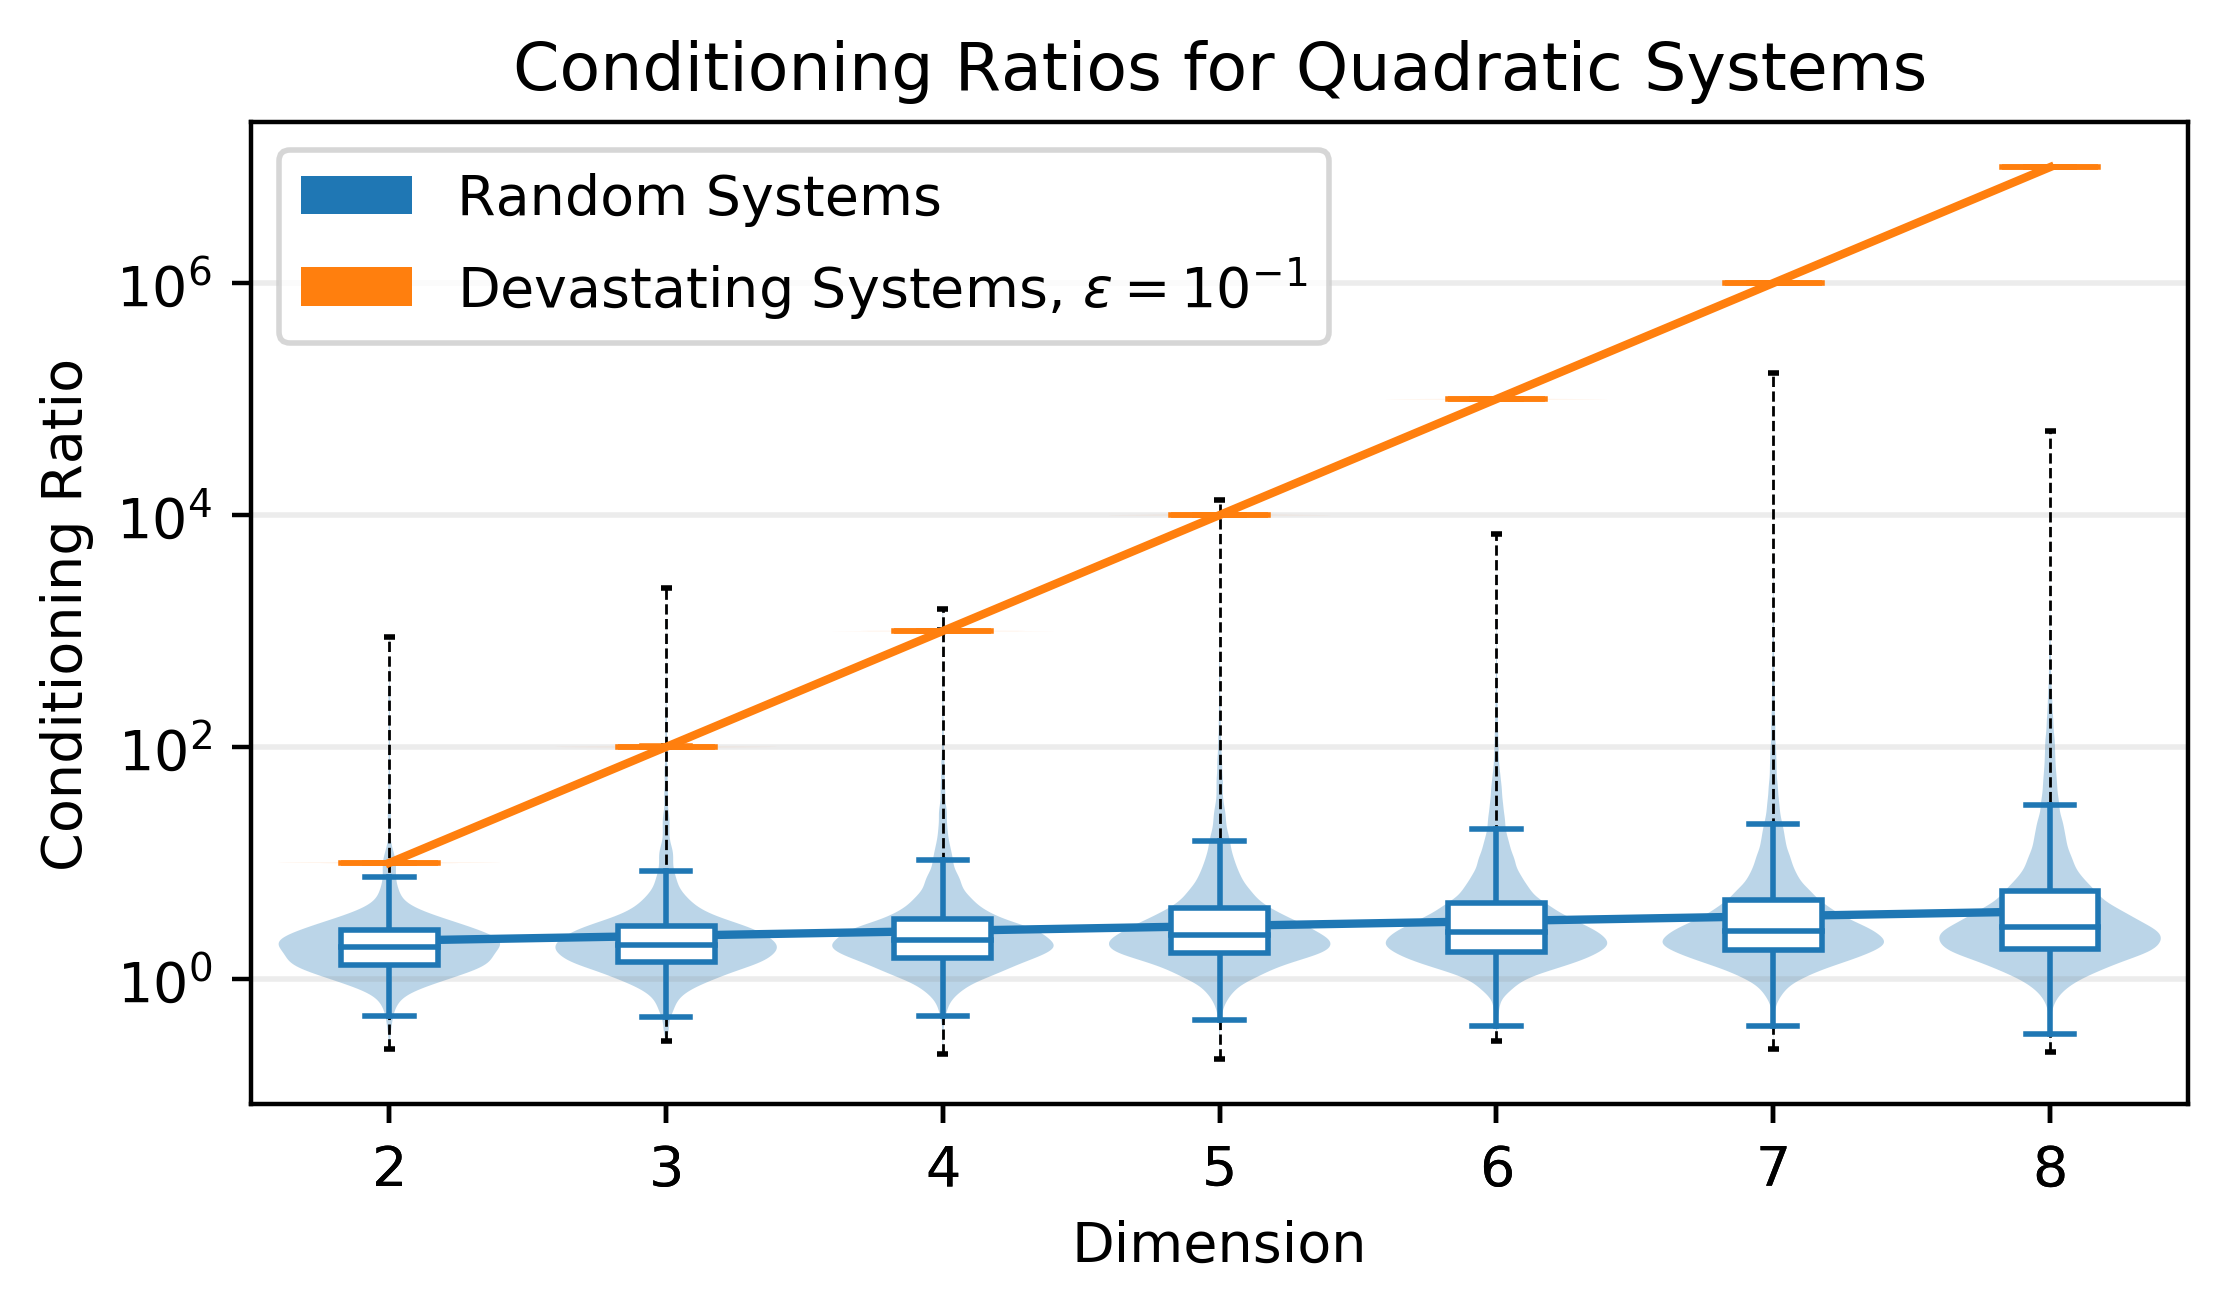

In [8]:
plot([rand_polished,dev_polished],
     ['Random Systems',r'Devastating Systems, $\epsilon=10^{-1}$'],
     figsize=(6.25,3.25), filename='rand_dev', title='Conditioning Ratios for Quadratic Systems')

### comparison to without polishing

folder = 'tests/conditioning_ratios/rand/nopol/'
normal_masks_nopol = {d:~np.load(folder+f'dim{d}/not_full_roots_deg2.npy') for d in range(3,5)}
normal_masks_nopol[2] = np.ones(300,dtype=bool)
rand_nopol = {d:np.stack(np.load(folder+f'dim{d}/deg2_res.npy',
                                allow_pickle=True)[normal_masks_nopol[d]])
                      for d in range(2,5)}
for d in rand_nopol.keys():
    print(rand_nopol[d].shape)

folder = 'tests/conditioning_ratios/dev/nopol/'
dev_nopol = {d:np.stack(np.load(folder+f'dim{d}/deg2.npy',
                                allow_pickle=True))
                      for d in range(2,5)}
for d in dev_nopol.keys():
    print(dev_nopol[d].shape)  

summary: it was practically the same, but polishing the denominator (root) did seem to make it ever so slightly more accurate, so let's go with that.

# perturbing the devastating example

In [16]:
dev_2 = devastating_conditioning_ratios([2,3,4],.01,'power',newton=False,save=False)

KeyboardInterrupt: 

In [ ]:
dev_2_delta_1 = devastating_conditioning_ratios([2,3,4,5],.01,'power',newton=False,save=False,delta=.1)

In [ ]:
dev_2_delta_2 = devastating_conditioning_ratios([2,3,4,5],.01,'power',newton=False,save=False,delta=.01)


In [ ]:
dev_2_delta_3 = devastating_conditioning_ratios([2,3,4,5],.01,'power',newton=False,save=False,delta=.001)

In [ ]:
dev_2_delta_4 = devastating_conditioning_ratios([2,3,4,5],.01,'power',newton=False,save=False,delta=.0001)

In [ ]:
dev_2_delta_5 = devastating_conditioning_ratios([2,3,4,5],.01,'power',newton=False,save=False,delta=.00001)

In [ ]:
plot([dev_2,
      dev_2_delta_5,
      dev_2_delta_4,
      dev_2_delta_3,
      dev_2_delta_2,
      dev_2_delta_1,
      {d:rand_polished[d] for d in range(2,6)}],
     [r'devastating Systems, $\epsilon=.01$',
      r'Perturbed devastating Systems, $\epsilon=.01, \delta=.00001$',
      r'Perturbed devastating Systems, $\epsilon=.01, \delta=.0001$',
      r'Perturbed devastating Systems, $\epsilon=.01, \delta=.001$',
      r'Perturbed devastating Systems, $\epsilon=.01, \delta=.01$',
      r'Perturbed devastating Systems, $\epsilon=.01, \delta=.1$',
      r'Random Systems'],
     figsize=(15,10), filename='perturbed')

$\epsilon=10^{-2}$, $\delta=0$
Slope: 1.9999992674663203 
Intercept: -1.9999754282694306 
Exponential Growth Rate: 98.99983132802915

$\epsilon=10^{-2}$, $\delta=10^{-4}$
Slope: 1.7442352853374472 
Intercept: -1.8051239186420096 
Exponential Growth Rate: 54.49262708943212

$\epsilon=10^{-2}$, $\delta=10^{-3}$
Slope: 1.3208443661402682 
Intercept: -1.440407739258664 
Exponential Growth Rate: 19.933621437301504

$\epsilon=10^{-2}$, $\delta=10^{-2}$
Slope: 0.904524268145805 
Intercept: -1.044416834229024 
Exponential Growth Rate: 7.026464110761751



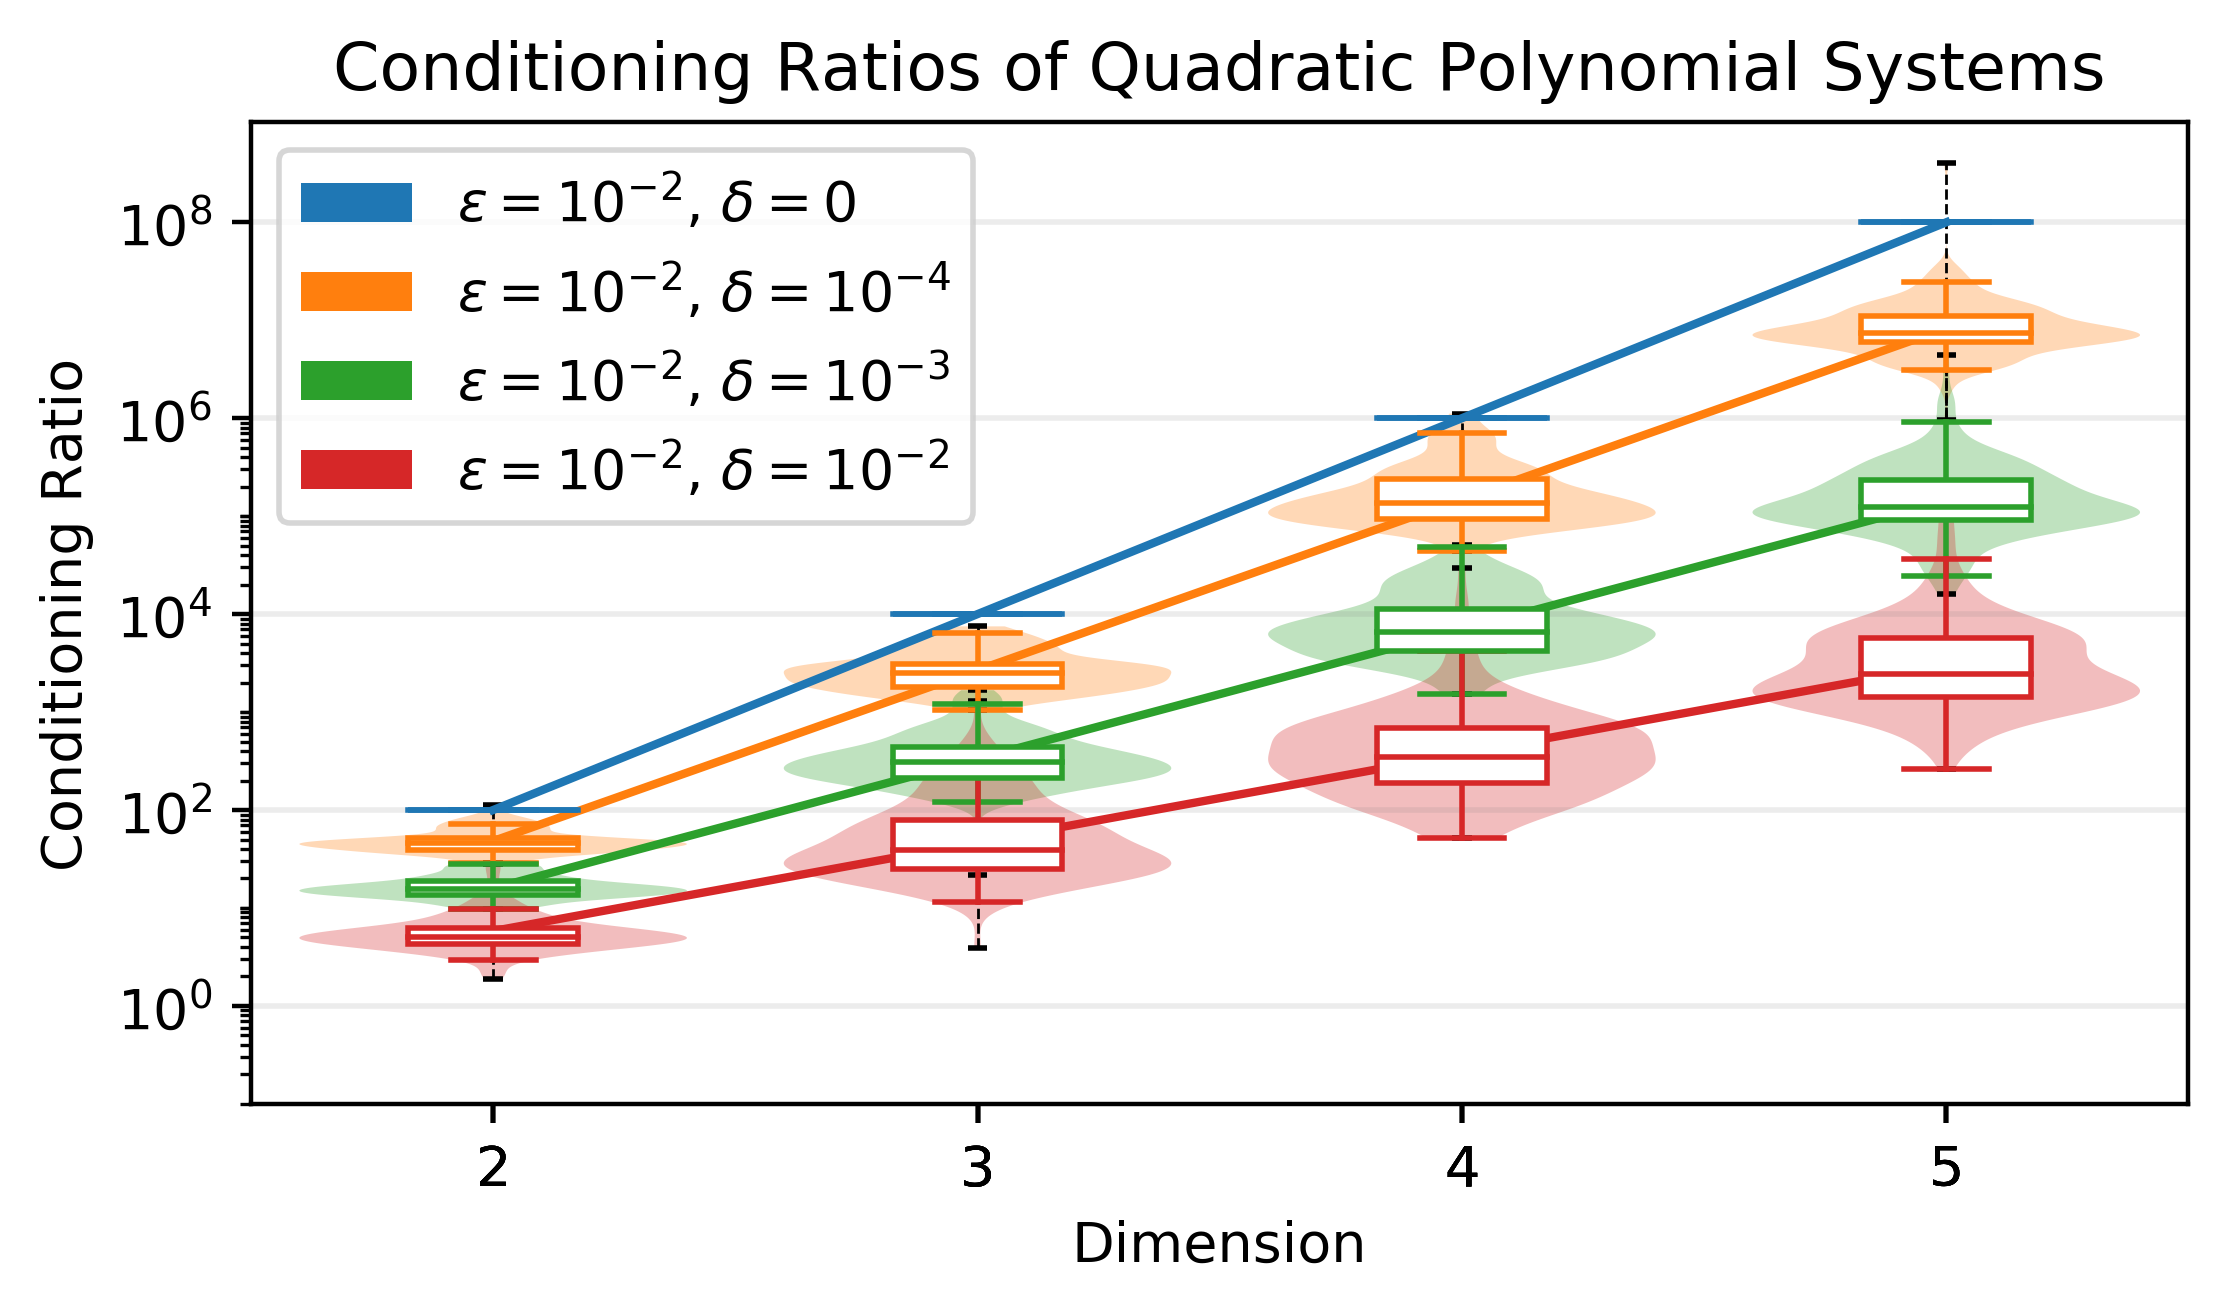

In [13]:
plot([dev_2,
      dev_2_delta_4,
      dev_2_delta_3,
      dev_2_delta_2],
     [r'$\epsilon=10^{-2}$, $\delta=0$',
      r'$\epsilon=10^{-2}$, $\delta=10^{-4}$',
      r'$\epsilon=10^{-2}$, $\delta=10^{-3}$',
      r'$\epsilon=10^{-2}$, $\delta=10^{-2}$'],
     figsize=(6.25,3.25), filename='perturbed_small', title='Conditioning Ratios of Quadratic Polynomial Systems',
     min_ylim=-1,
     max_ylim=6)

# How do the slopes of these lines decrease as you perturb more and more?

In [14]:
deltas,slopes = [],[]
for delta in np.logspace(-6,-1):
    print('delta =',delta,end='\r')
    data = devestating_conditioning_ratios([2,3,4,5],.01,
                                      'power',
                                      newton=False,
                                      save=False,
                                      delta=delta)
    data_log10 = [np.log10(data[d].flatten()) for d in data.keys()]
    points = np.array([[d,val] for i,d in enumerate(data.keys()) for val in data_log10[i]])
    slope = linregress(points)[0]
    deltas.append(delta)
    slopes.append(slope)

In [15]:
np.save('tests/conditioning_ratios/deltas.npy',deltas)
np.save('tests/conditioning_ratios/deltaslopes.npy',slope)

$\delta=0$
Slope: 1.9999992674663203 
Intercept: -1.9999754282694306 
Exponential Growth Rate: 98.99983132802915

$\delta=10^{-4}$
Slope: 1.7442352853374472 
Intercept: -1.8051239186420096 
Exponential Growth Rate: 54.49262708943212

$\delta=10^{-3}$
Slope: 1.3208443661402682 
Intercept: -1.440407739258664 
Exponential Growth Rate: 19.933621437301504

$\delta=10^{-2}$
Slope: 0.904524268145805 
Intercept: -1.044416834229024 
Exponential Growth Rate: 7.026464110761751

Unperturbed
Slope: 1.9999992674663203 
Intercept: -1.9999754282694306 
Exponential Growth Rate: 98.99983132802915

$\delta=10^{-4}$
Slope: 1.7442352853374472 
Intercept: -1.8051239186420096 
Exponential Growth Rate: 54.49262708943212

$\delta=10^{-3}$
Slope: 1.3208443661402682 
Intercept: -1.440407739258664 
Exponential Growth Rate: 19.933621437301504

$\delta=10^{-2}$
Slope: 0.904524268145805 
Intercept: -1.044416834229024 
Exponential Growth Rate: 7.026464110761751



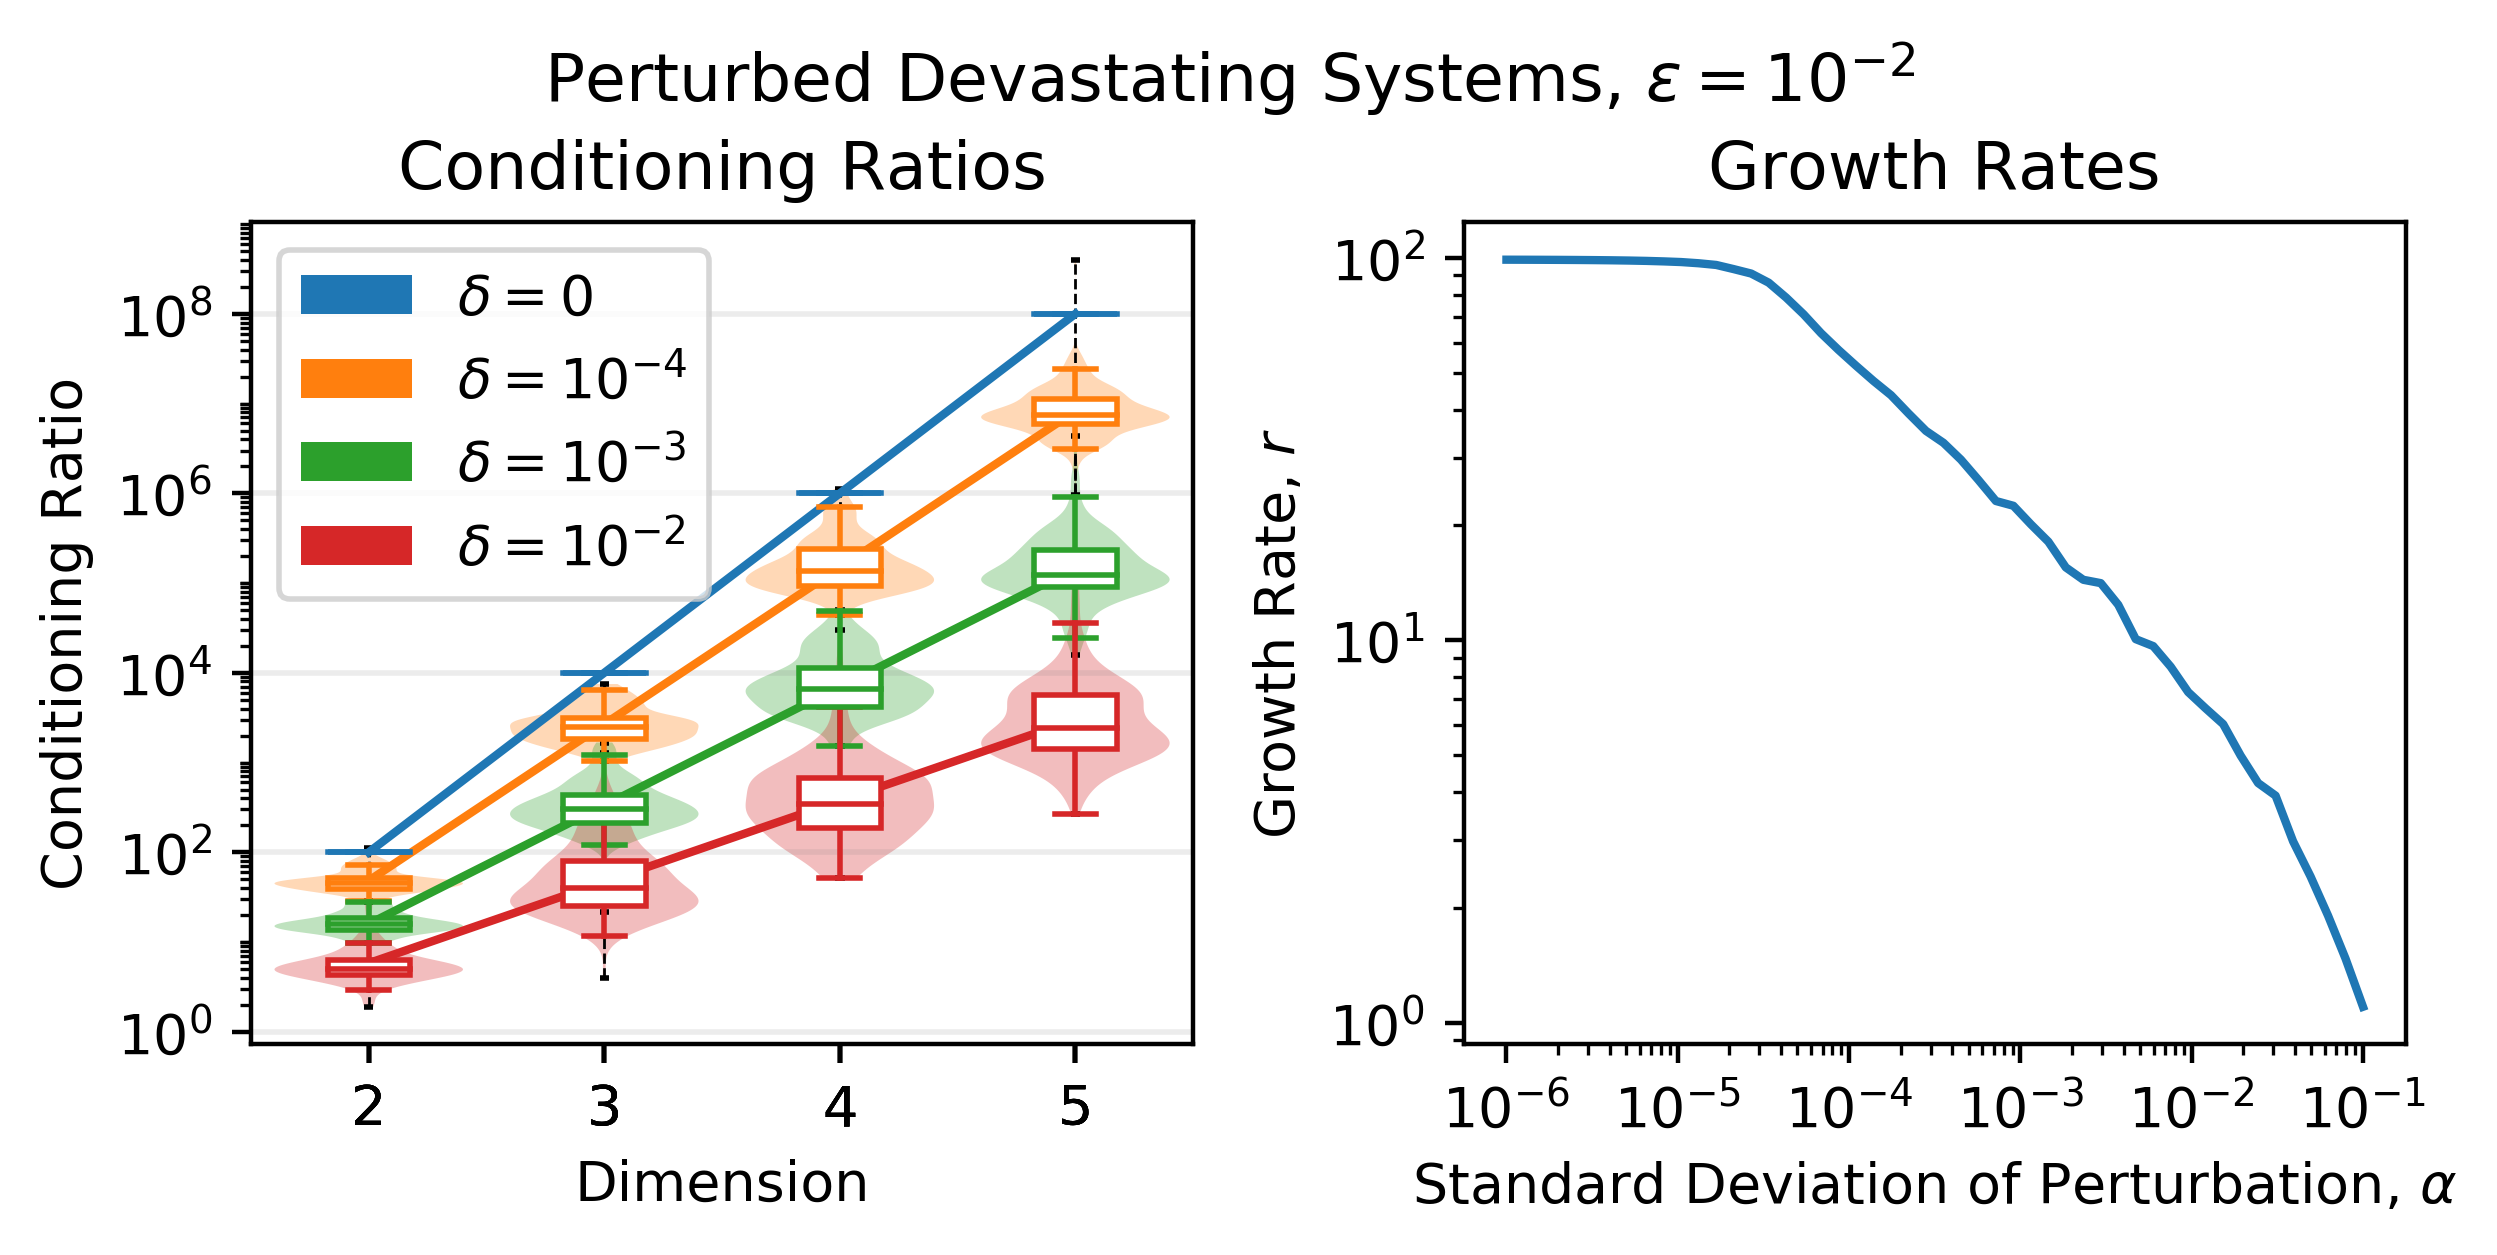

In [16]:
plot([[dev_2,
      dev_2_delta_4,
      dev_2_delta_3,
      dev_2_delta_2],
      [dev_2,
      dev_2_delta_4,
      dev_2_delta_3,
      dev_2_delta_2]],
     [[r'$\delta=0$',
      r'$\delta=10^{-4}$',
      r'$\delta=10^{-3}$',
      r'$\delta=10^{-2}$',],
      [r'Unperturbed',
      r'$\delta=10^{-4}$',
      r'$\delta=10^{-3}$',
      r'$\delta=10^{-2}$',]
      ],
     figsize=(6.25,3.25), filename='perturbed_small_with_growth_rates', 
     title=['Conditioning Ratios','Growth Rates',r'Perturbed Devastating Systems, $\varepsilon=10^{-2}$'],
     subplots=[1,2], _2nd_plot=[deltas,10**np.array(slopes)-1],
     min_ylim=0,max_ylim=9)

summary: 

perturbing opens up new choices of basis

cond num probably isn't cont at zero

#### FIGURES IN THE PAPER:
* figsize is the desired actual size in the final printed article, measured in inches -- controlable
* dpi at least 300 -- defaults to 400
* file type  pdf -- does that in saving
* bbox_inches = ‘tight’ -- does that in saving

In [17]:
def get_log_medians(data):
    return [np.median(np.log10(data[d])) for d in data.keys()]
def get_perc_neg(data):
    return [np.mean(np.log10(data[d])<0)*100 for d in data.keys()]

In [18]:
print('log medians')
print('Rand:',np.round(get_log_medians(rand_polished),4))
print('Dev :',np.round(get_log_medians(dev_polished),4))
print('Rand % Negative:',np.round(get_perc_neg(rand_polished),4))

log medians
Rand: [0.2801 0.2958 0.3331 0.3817 0.4027 0.4176 0.452 ]
Dev : [1.0028 2.0018 3.0015 4.0021 5.0019 6.0012 7.0034]
Rand % Negative: [9.5833 9.096  6.9107 5.0902 4.2508 3.7985 3.8086]


# Generate Random Systems with known roots

Goal: Find $n$ hyperellipses that have common roots at  chosen points $\mathbf {r_1,\ldots,r_n}$. 

Let's just take this one hyperellipse at a time.

Pick a chosen center $\mathbf c$ of the hyperellipse.

Then the equation for the hyperellipse is

$$f(\mathbf x) = \sum_{j=1}^n \frac{(x_j - c_j)^2}{a_{j}^2} - 1$$

and it has a root at $\mathbf r_i$ iff

$$\sum_{j=1}^n \frac{(r_{ij} - c_j)^2}{a_{j}^2} = 1$$

Good news! This is just a linear system in $1/a_i^2$!

$$\begin{bmatrix}
(r_{11} - c_1)^2       &   (r_{11} - c_2)^2       & \dots     &   (r_{1n} - c_n)^2       \\
(r_{21} - c_1)^2       &   (r_{21} - c_2)^2       & \dots     &   (r_{2n} - c_n)^2       \\
\vdots  &  \vdots   &   \vdots  &   \vdots  \\   
(r_{n1} - c_1)^2       &   (r_{n1} - c_2)^2       & \dots     &   (r_{nn} - c_n)^2       \\
\end{bmatrix}
\begin{bmatrix}
1/a_1^2    \\
1/a_2^2     \\
\vdots  \\
1/a_n^2     \\
\end{bmatrix}=
\mathbb 1$$

If you get a solution that has some negative outputs for $1/a_i^2$, then you've got some sort of cross between a hyperellipse and a hyperhyperbola.

For convenience, we're just going to use $1/a_i^2$ for our coefficients and not actually convert to $a_i$. In the code, I've denoted the $\mathbf a$ vector as `scalar`.

If we repeat this process $n$ times, we end up with $n$ hyper-conics that have common roots at $\mathbf {r_1,\ldots,r_n}$.

In [17]:
np.random.seed(0)
dim = 2
roots = np.random.randn(dim,dim)
centers = np.random.randn(dim,dim)
print('Chosen Roots:',*roots)
print('Chosen Centers:',*centers)

Chosen Roots: [1.76405235 0.40015721] [0.97873798 2.2408932 ]
Chosen Centers: [ 1.86755799 -0.97727788] [ 0.95008842 -0.15135721]


In [18]:
mp.matrix([[coord for coord in root] for root in roots])

matrix(
[['1.76405234596766', '0.400157208367223'],
 ['0.978737984105739', '2.24089319920146']])

In [19]:
scalars = [get_scalar(c,roots) for c in centers]
print('Scalars:',*scalars)

Scalars: [-6.09487717  0.56147239] [1.42922176 0.17453276]


In [20]:
polys = [get_MultiPower(c,roots) for c in centers]
print('Coefficients of Polynomials:',*[p.coeff for p in polys],sep='\n')

Coefficients of Polynomials:
[[-21.72130051   1.0974291    0.56147239]
 [ 22.76507313   0.           0.        ]
 [ -6.09487717   0.           0.        ]]
[[ 0.29411112  0.05283358  0.17453276]
 [-2.71577408  0.          0.        ]
 [ 1.42922176  0.          0.        ]]


# Generate Random Systems that Almost have Multiple Roots

### roots of multiplicity dim

In [74]:
alphas = np.array([1.00000000e-06, 1.26485522e-06, 1.59985872e-06,
         2.02358965e-06, 2.55954792e-06, 3.23745754e-06,
         4.09491506e-06, 5.17947468e-06, 6.55128557e-06,
         8.28642773e-06, 1.04811313e-05, 1.32571137e-05,
         1.67683294e-05, 2.12095089e-05, 2.68269580e-05,
         3.39322177e-05, 4.29193426e-05, 5.42867544e-05,
         6.86648845e-05, 8.68511374e-05, 1.09854114e-04,
         1.38949549e-04, 1.75751062e-04, 2.22299648e-04,
         2.81176870e-04, 3.55648031e-04, 4.49843267e-04,
         5.68986603e-04, 7.19685673e-04, 9.10298178e-04,
         1.15139540e-03, 1.45634848e-03, 1.84206997e-03,
         2.32995181e-03, 2.94705170e-03, 3.72759372e-03,
         4.71486636e-03, 5.96362332e-03, 7.54312006e-03,
         9.54095476e-03, 1.20679264e-02, 1.52641797e-02,
         1.93069773e-02, 2.44205309e-02, 3.08884360e-02,
         3.90693994e-02, 4.94171336e-02, 6.25055193e-02,
         7.90604321e-02, 1.00000000e-01, 1e-5,
         1e-4, 1e-3, 1e-2])
alphasrt = np.argsort(alphas)

In [101]:
folder = 'tests/conditioning_ratios/nearby_roots/mult/'
condratios = []
eigenconds = []
rootconds = []
testsperdim = 100
digitsprecision = 100
for alpha in alphas:
    alphastr = str(alpha).replace('.','_')
    filename = 'alpha'+alphastr+f'_{testsperdim}testsperdim_{digitsprecision}digitsprecision'
    fileend = '.npy'
    condratios.append(np.load(folder+filename+fileend,allow_pickle=True).item())
    eigenconds.append(np.load(folder+filename+'_eigconds'+fileend,allow_pickle=True).item())
    rootconds.append(np.load(folder+filename+'_rootconds'+fileend,allow_pickle=True).item())
condratios,eigenconds,rootconds = np.array(condratios),np.array(eigenconds),np.array(rootconds)

In [102]:
def get_slope(dataset):
    dataset_log10 = [np.log10(dataset[d].flatten()) for d in dataset.keys()]
    dataset_log10_aspoints = np.array([[d,val] for i,d in enumerate(dataset.keys()) 
                                       for val in dataset_log10[i]])
    return linregress(dataset_log10_aspoints)[0]

In [103]:
alpha_cratio_slopes_mult = np.array([get_slope(cratio) for cratio in condratios])
alpha_eigc_slopes_mult = np.array([get_slope(eigc) for eigc in eigenconds])
alpha_rootc_slopes_mult = np.array([get_slope(rootc) for rootc in rootconds])

In [104]:
np.save('tests/conditioning_ratios/alphas',alphas)
np.save('tests/conditioning_ratios/alphaslopes_mult_cratios',alpha_cratio_slopes_mult)
np.save('tests/conditioning_ratios/alphaslopes_mult_eigc',alpha_eigc_slopes_mult)
np.save('tests/conditioning_ratios/alphaslopes_mult_rootc',alpha_rootc_slopes_mult)

$\alpha=10^{-6}$
Slope: 5.518879678133241 
Intercept: -10.937176289698735 
Exponential Growth Rate: 330277.02439183556

$\alpha=10^{-4}$
Slope: 3.525907358357858 
Intercept: -6.941187183584294 
Exponential Growth Rate: 3355.6600392313385

$\alpha=10^{-2}$
Slope: 1.571553159218953 
Intercept: -3.0516516238587035 
Exponential Growth Rate: 36.286632233934654

$\alpha=10^{-6}$
Slope: 5.518879678133241 
Intercept: -10.937176289698735 
Exponential Growth Rate: 330277.02439183556

$\alpha=10^{-4}$
Slope: 3.525907358357858 
Intercept: -6.941187183584294 
Exponential Growth Rate: 3355.6600392313385

$\alpha=10^{-2}$
Slope: 1.571553159218953 
Intercept: -3.0516516238587035 
Exponential Growth Rate: 36.286632233934654



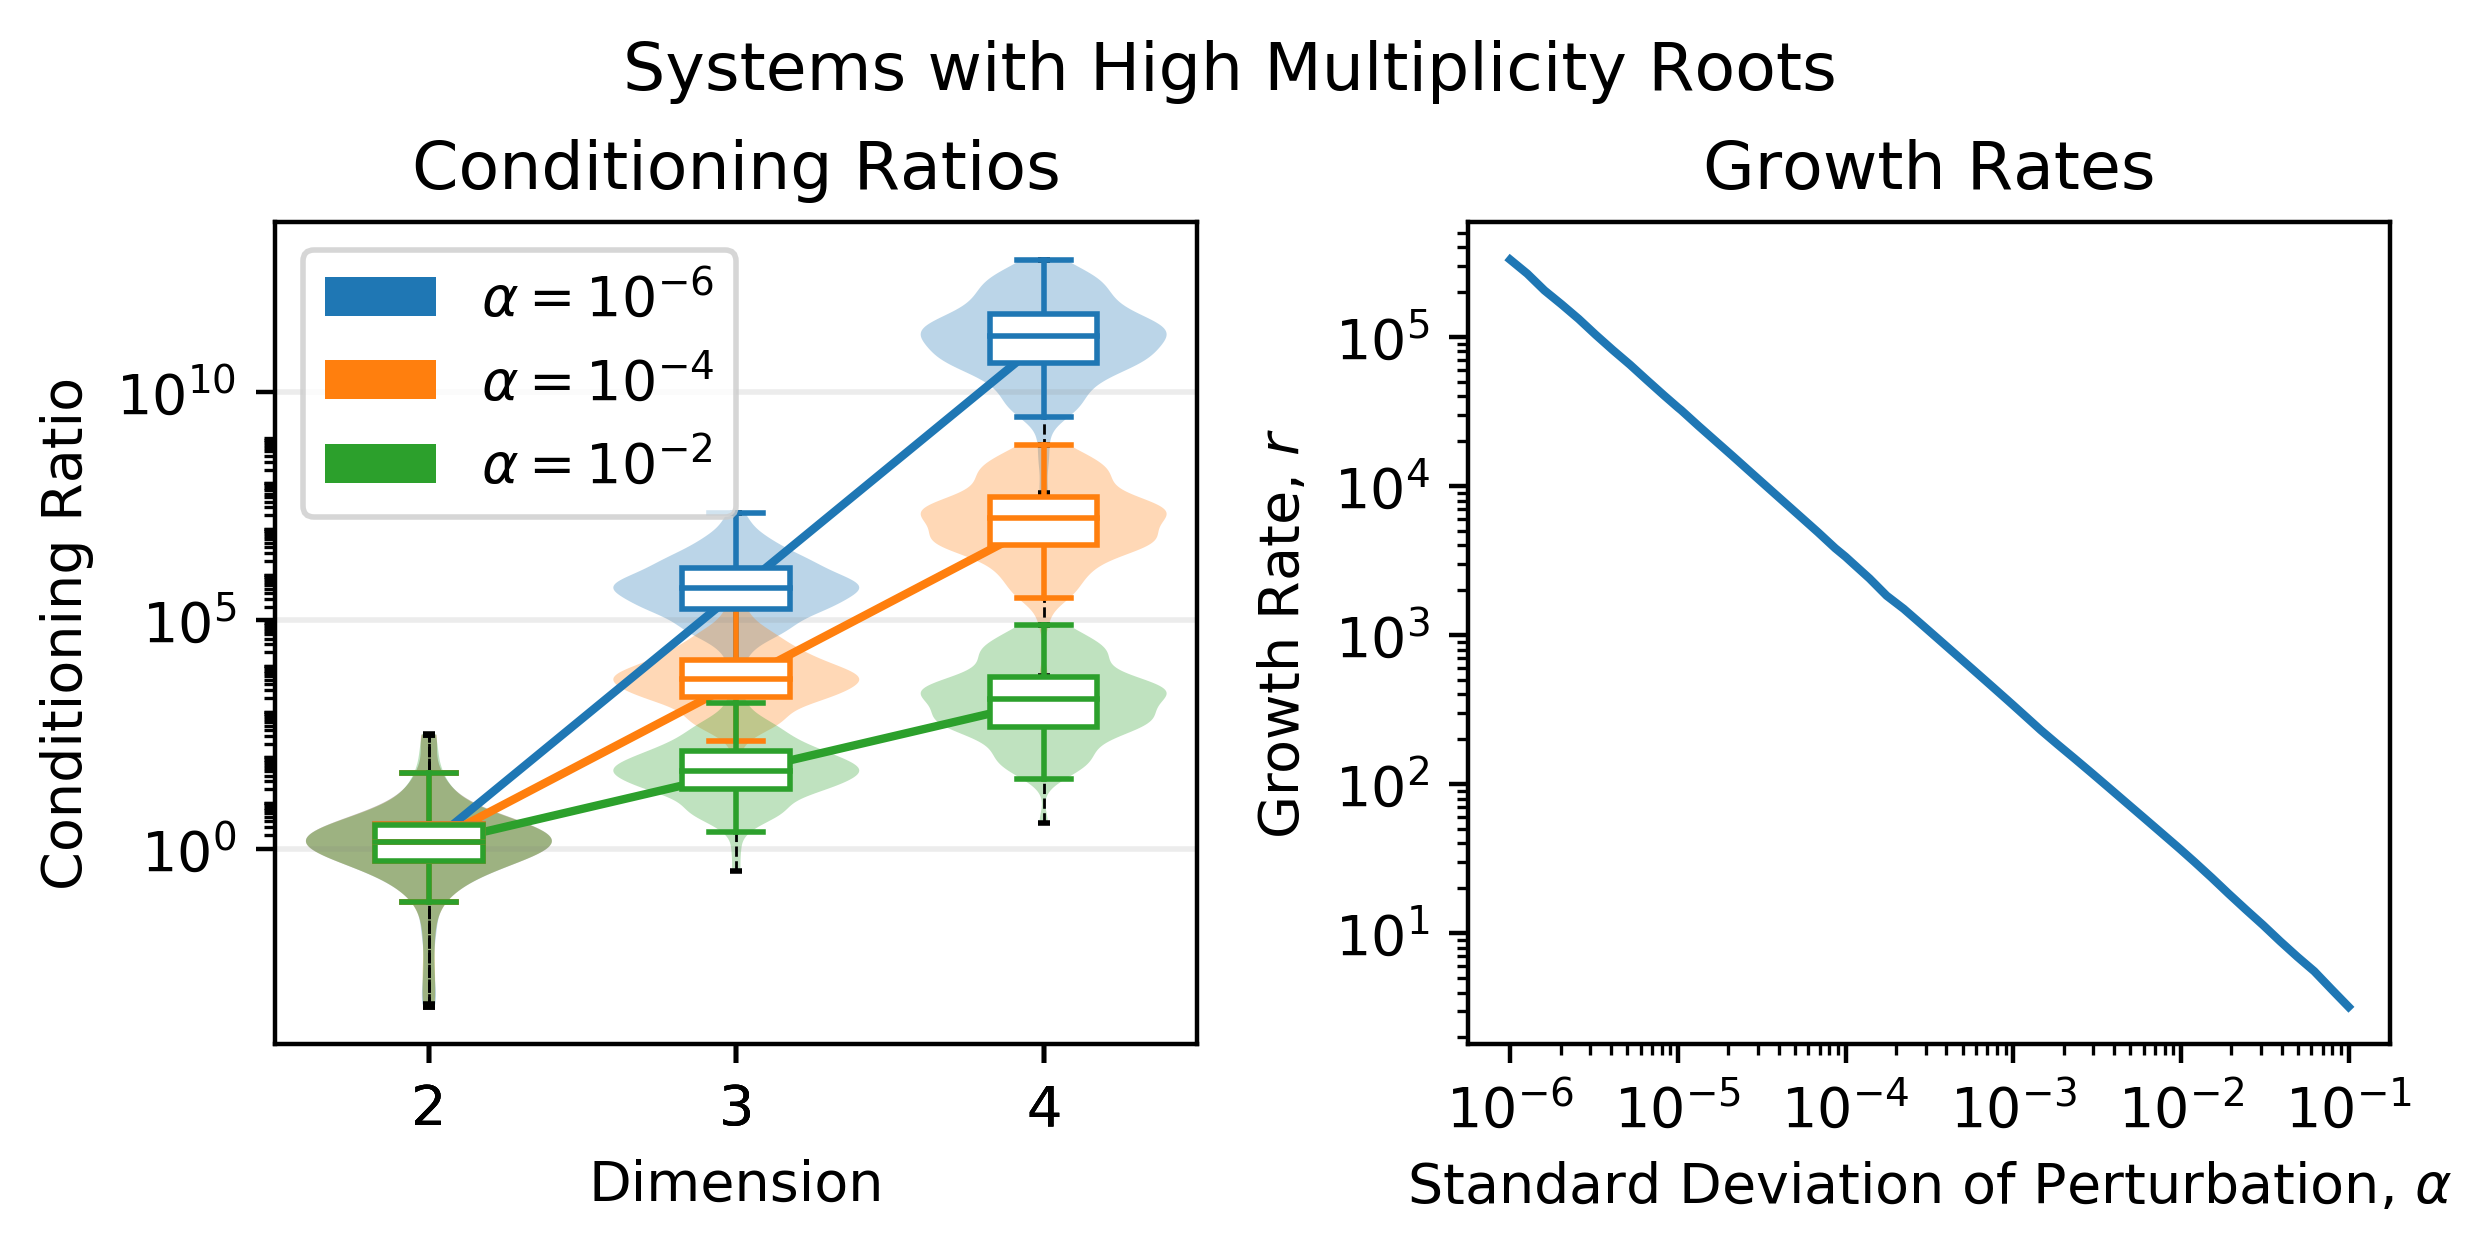

In [113]:
plot([condratios[alphas_for_plot_idx],condratios[alphas_for_plot_idx]],
     [[r'$\alpha=10^{-6}$',
      r'$\alpha=10^{-4}$',
      r'$\alpha=10^{-2}$'],
      [r'$\alpha=10^{-6}$',
      r'$\alpha=10^{-4}$',
      r'$\alpha=10^{-2}$']],
     figsize=(6.25,3.25), filename='high_multiplicities_with_growth_rates', 
     title=['Conditioning Ratios','Growth Rates',r'Systems with High Multiplicity Roots'],
     subplots=[1,2], 
     _2nd_plot=[alphas[alphasrt],10**np.array(alpha_cratio_slopes_mult[alphasrt])-1],
     min_ylim=0,max_ylim=9,
    _2nd_plot_axis_labels=[r'Standard Deviation of Perturbation, $\alpha$','Growth Rate, $r$'])

### double, not multiple roots

In [47]:
doub1 = get_data(alpha=.1,gen_func=gen_almost_double_roots)

2
3
4


In [52]:
doub2 = get_data(alpha=.01,gen_func=gen_almost_double_roots)

2
3
4


In [49]:
doub3 = get_data(alpha=.001,gen_func=gen_almost_double_roots)

2
3
4


$\delta=10^{-3}$
Slope: -0.07392482273080075 
Intercept: 0.23354112520716486 
Exponential Growth Rate: -0.1565192466166937

$\delta=10^{-2}$
Slope: -0.07509277038116655 
Intercept: 0.23595269292247686 
Exponential Growth Rate: -0.15878457100359988

$\delta=10^{-1}$
Slope: -0.07814334290258908 
Intercept: 0.21943550847037846 
Exponential Growth Rate: -0.16467273474819855



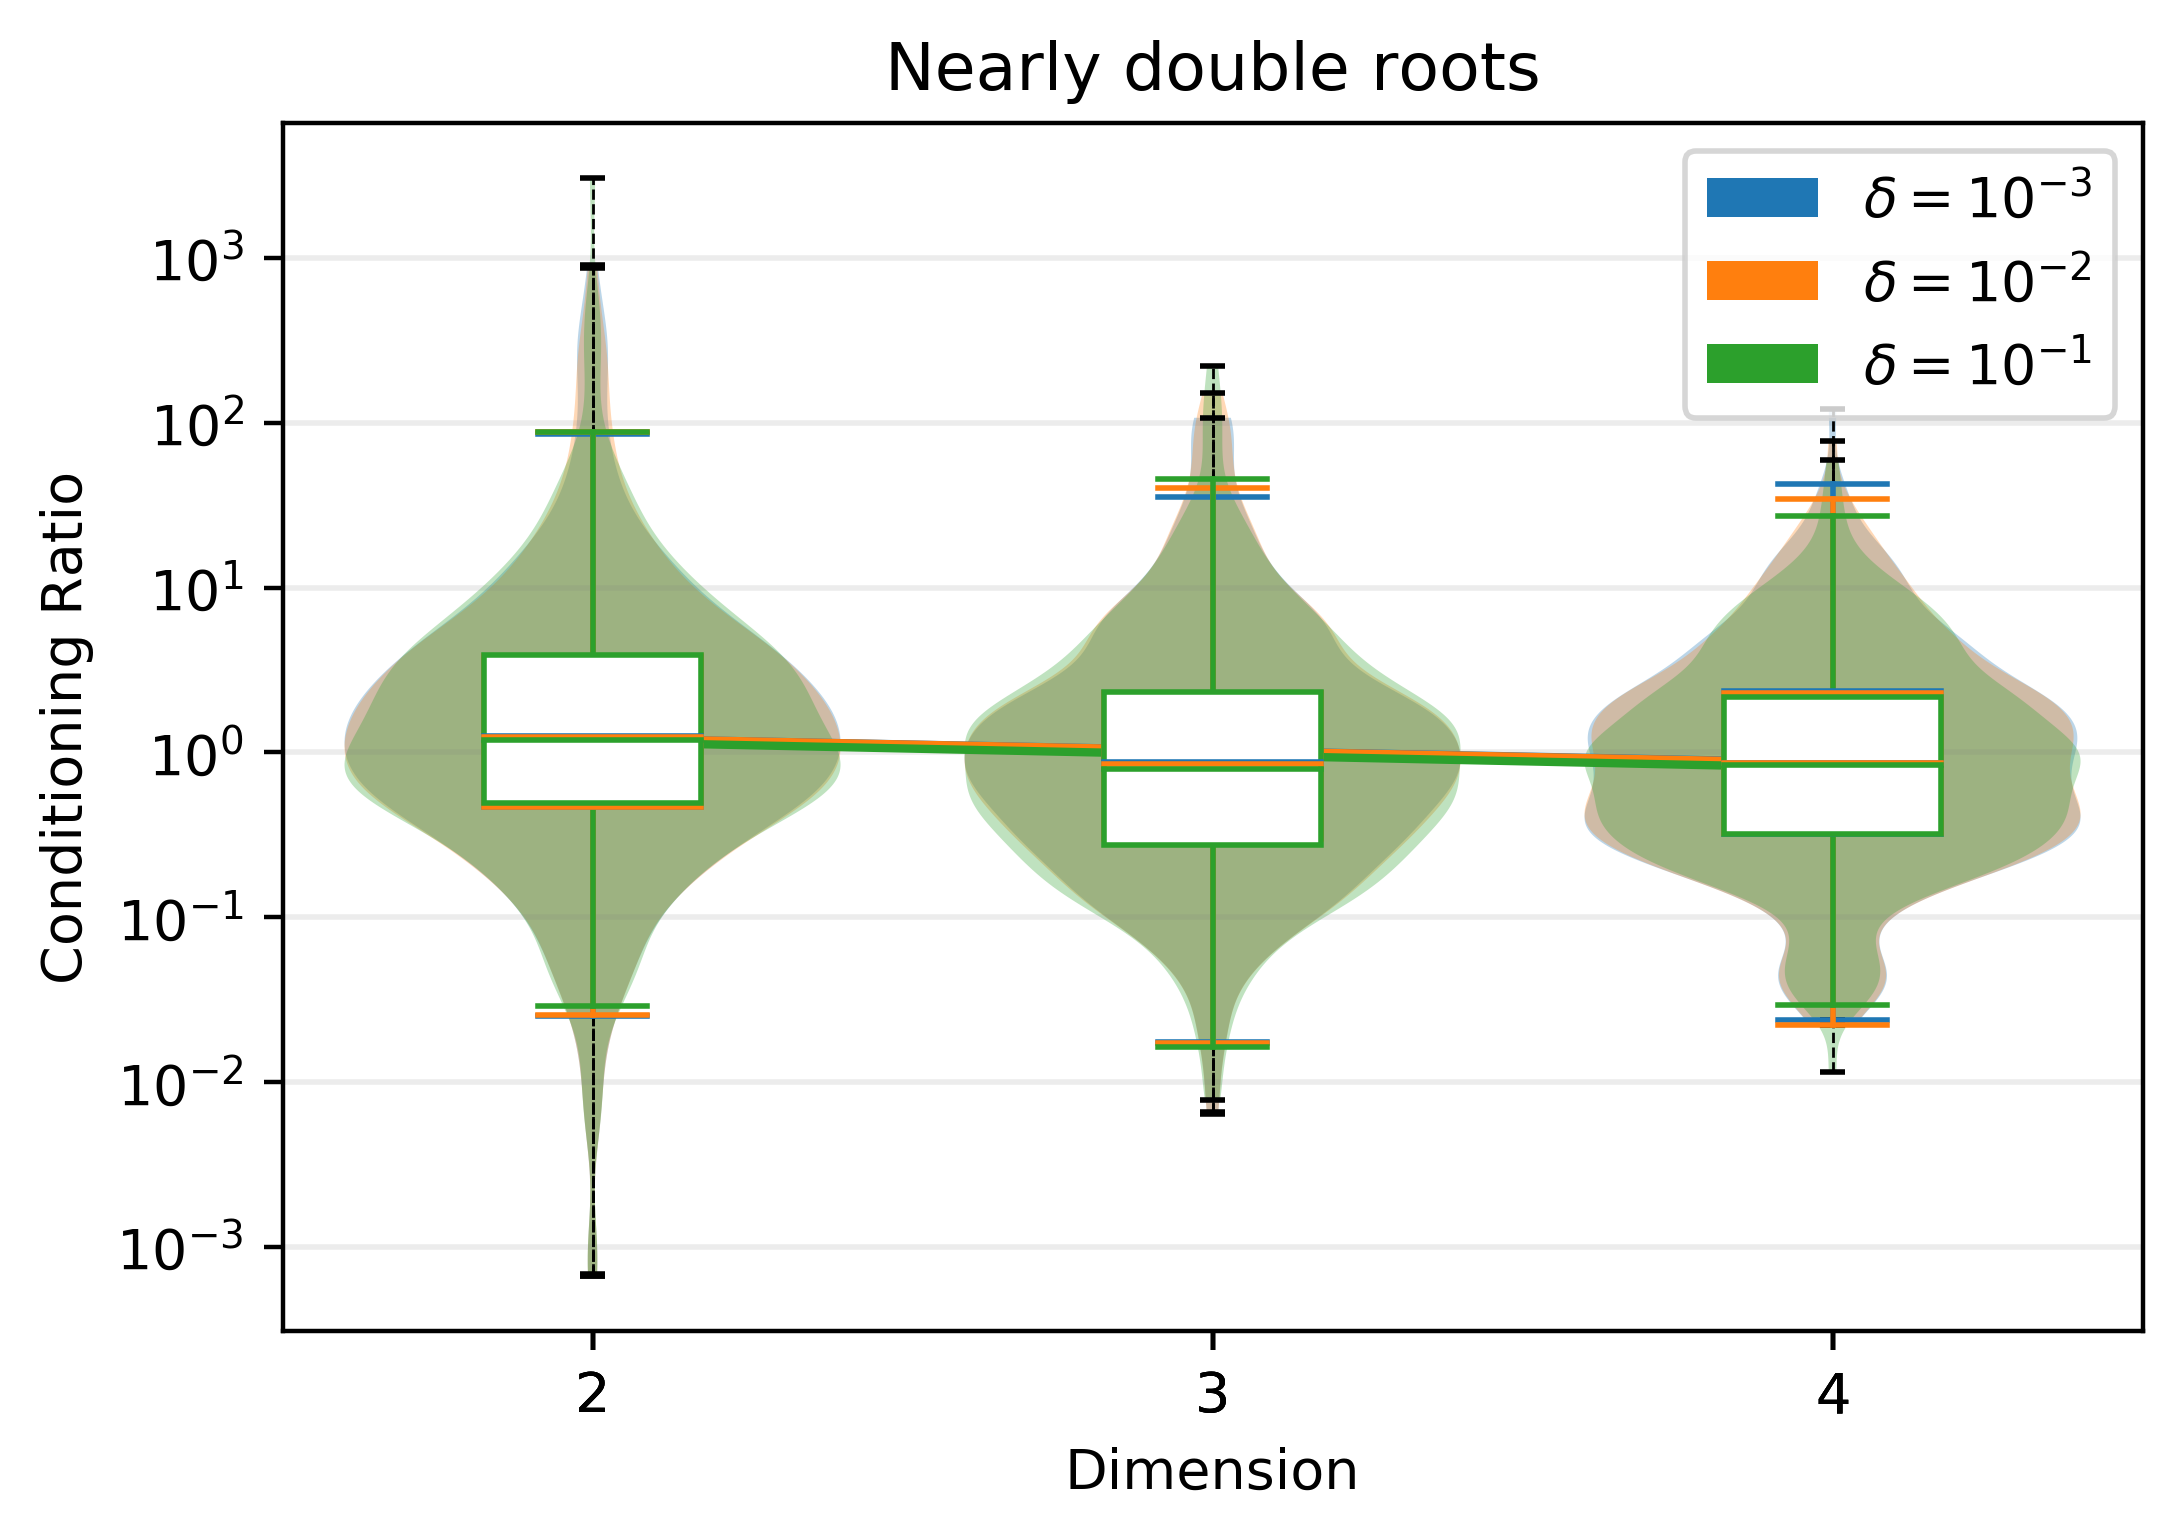

In [53]:
plot([doub3,doub2,doub1],
      [r'$\delta=10^{-3}$',
       r'$\delta=10^{-2}$',
       r'$\delta=10^{-1}$'],
     title = 'Nearly double roots', filename='nearly_double')

In [54]:
alphaslopes_doubles

[-0.07424644247157317,
 -0.07226681627569283,
 -0.07294929330397275,
 -0.07076609061231912,
 -0.0722018827533944,
 -0.07424013396170878,
 -0.07192307918897589,
 -0.0730037541170116,
 -0.07240513757193355,
 -0.07252259301193598,
 -0.07242940292471983,
 -0.07280632246426995,
 -0.0734160835273645,
 -0.07345620594026608,
 -0.07334035688500073,
 -0.07333597691561125,
 -0.07330360804289224,
 -0.07330771962939886,
 -0.07329137065142817,
 -0.07332212820752218,
 -0.07334391050317479,
 -0.07336024290852662,
 -0.07338418779070084,
 -0.0734121082258202,
 -0.07345018521390934,
 -0.07349810780687245,
 -0.0735608590018427,
 -0.07364110569936388,
 -0.07374206031393915,
 -0.07386735411984846,
 -0.0740192604558519,
 -0.07420078278313241,
 -0.07441732014906223,
 -0.07468082479538679,
 -0.07502464139124972,
 -0.07555573572338413,
 -0.07647855683013217,
 -0.07558434634042802,
 -0.07520523884213678,
 -0.07507586195319353,
 -0.07534670707507124,
 -0.07582336355005415,
 -0.07643510170502874,
 -0.0773951184625

# Generate Random Hyperconic Systems

In [56]:
rand1 = get_data(alpha=.1,gen_func=gen_rand_hyperconic)

2
3
4


Random Hyperconic Systems
Slope: -0.13122531415928243 
Intercept: 0.20854288104326085 
Exponential Growth Rate: -0.2607783363561693



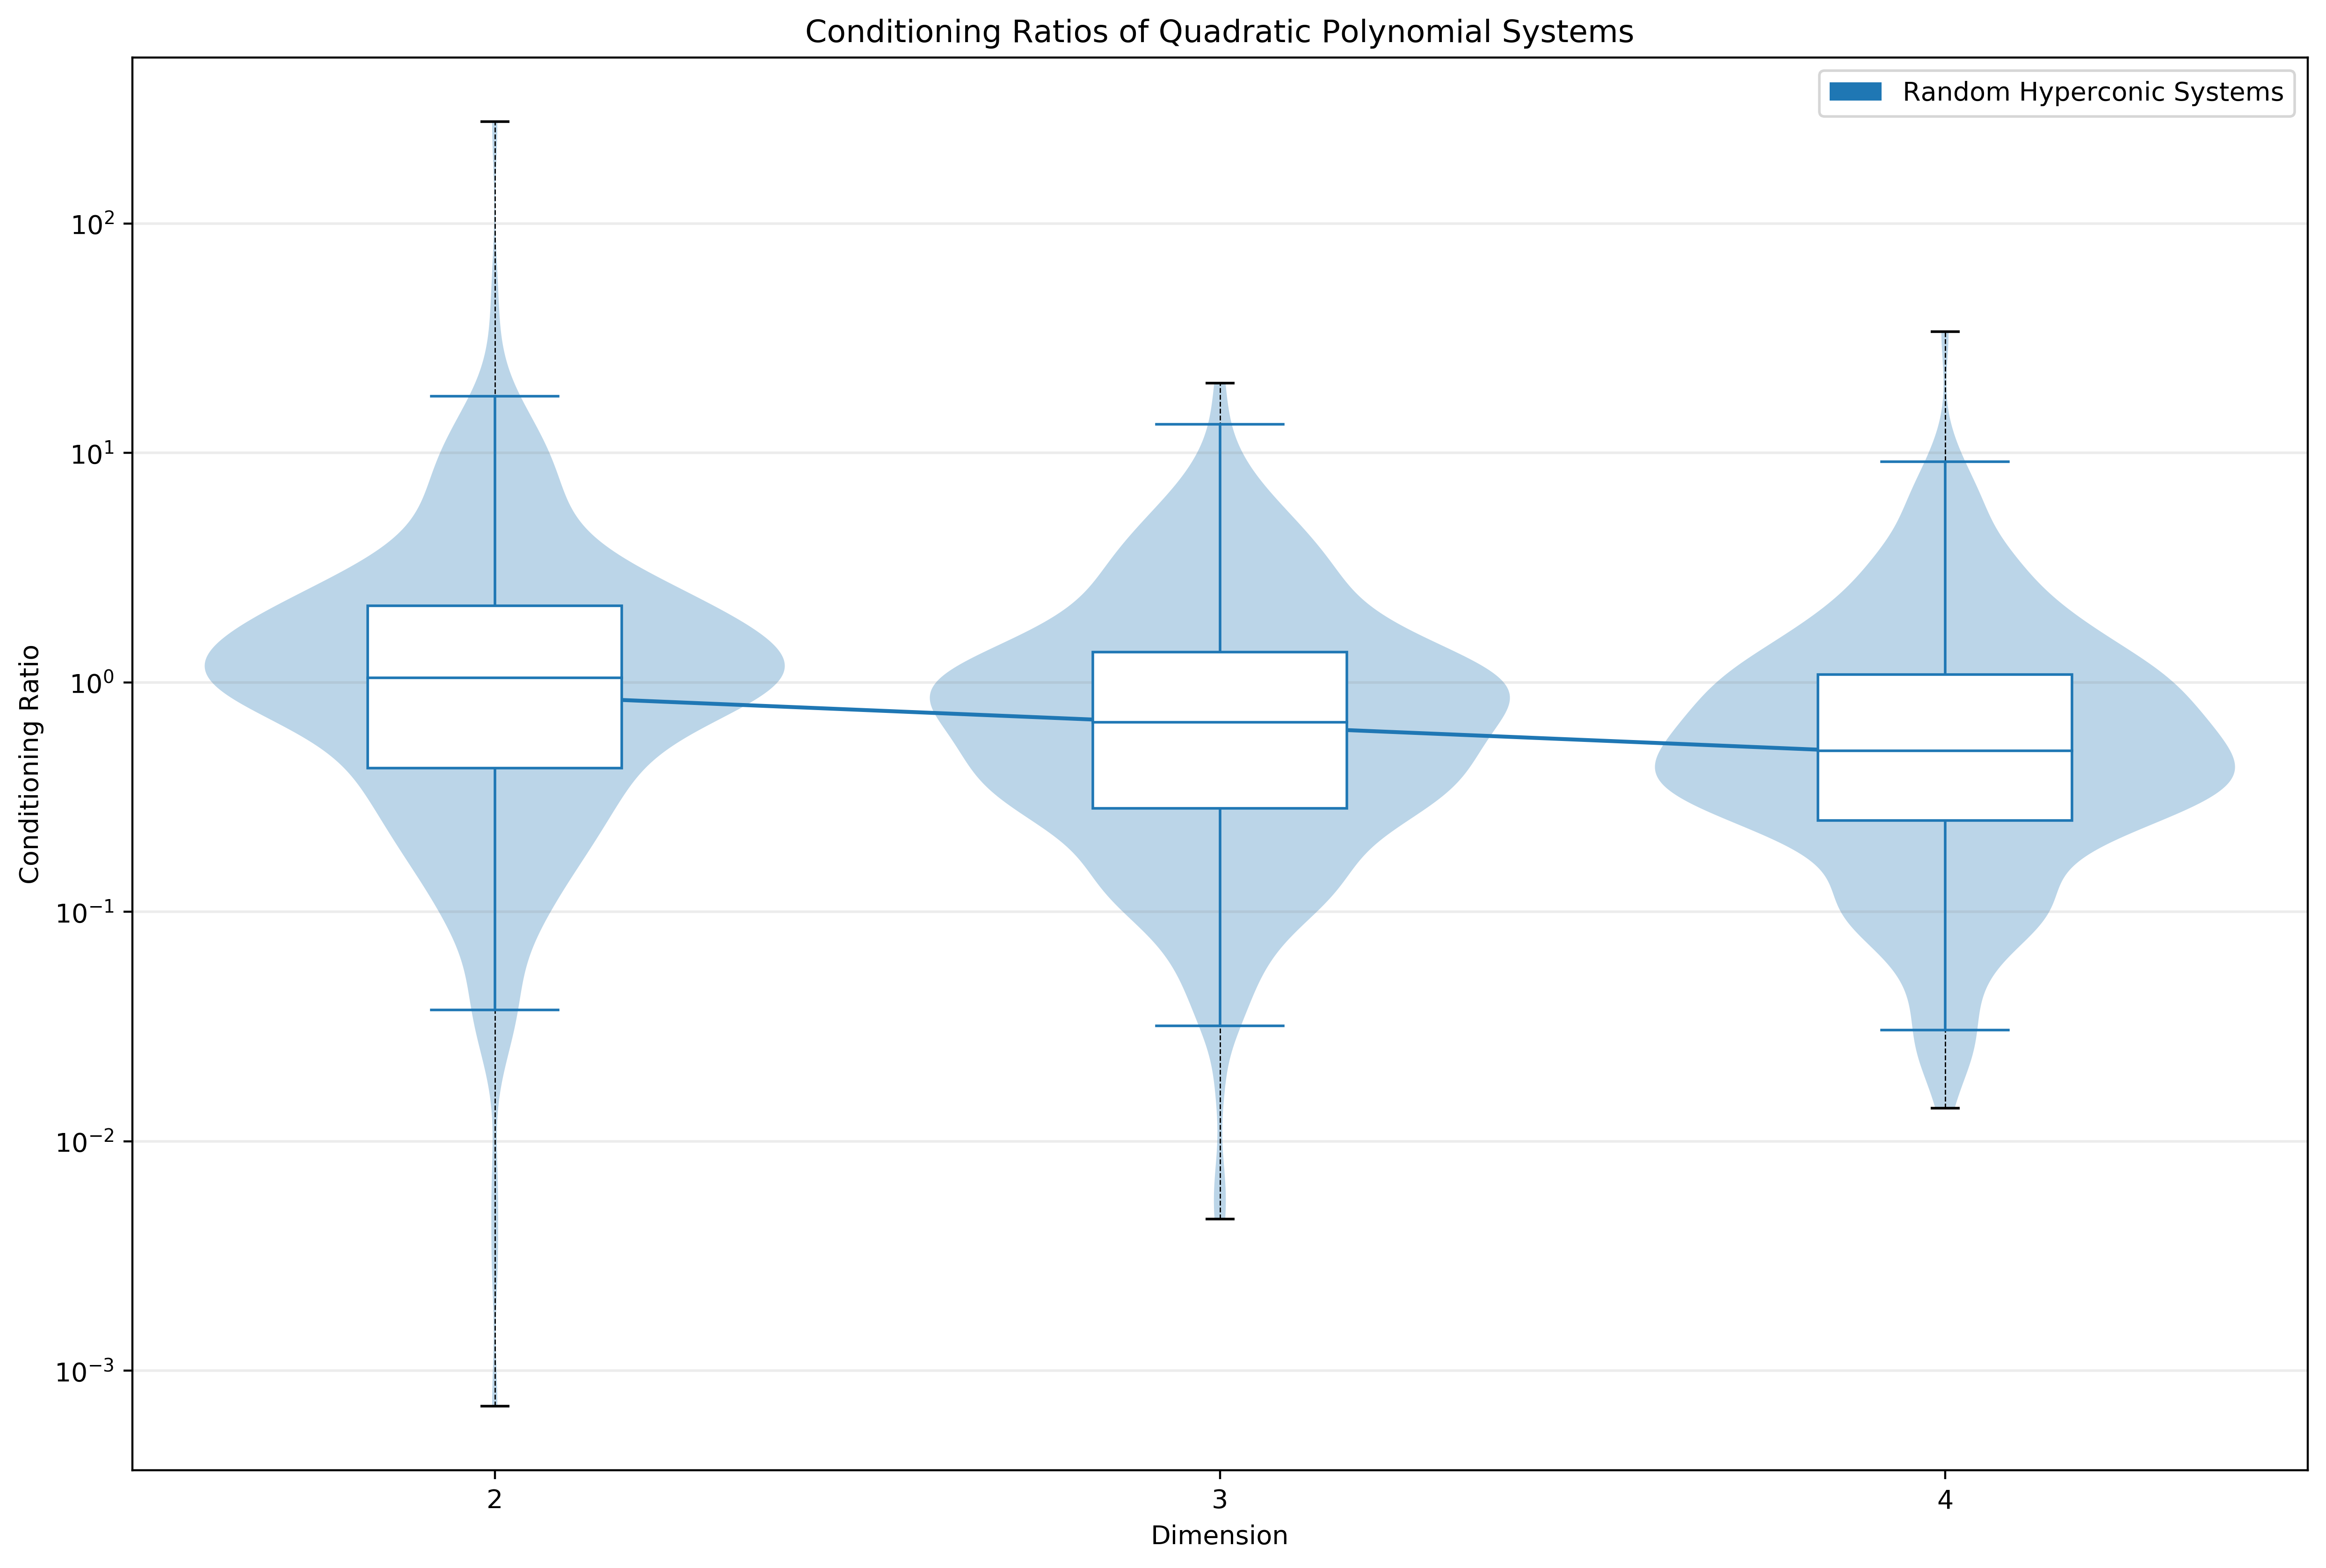

In [57]:
plot([rand1],
     [r'Random Hyperconic Systems'],
     figsize=(15,10), filename='random_hyperconic')